### Heart Disease Survey UCI

In [1]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
# Cell 2: Load data
df = pd.read_csv('heart_disease_uci.csv')

# Quick look
print(df.shape)
df.head()

(920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
# Cell 3: Basic info
df.info()
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
r

In [ ]:
# Cell 4: Data cleaning transformations
# - sex: convert 0/1 to 'Female'/'Male'
# - cp: map numeric codes to labels if coded as 1-4
# - fbs, exang: convert to bool/int
# - restecg, slope, thal: map codes to strings
# - ca and thal sometimes have missing values encoded as '?'

# Example transformations (adapt to your CSV's encoding):
if df['sex'].dtype != 'object':
    df['sex'] = df['sex'].map({0: 'female', 1: 'male'})

# CP mapping example (if 1-4 numeric)
cp_map = {1: 'typical angina', 2: 'atypical angina', 3: 'non-anginal', 4: 'asymptomatic'}
if df['cp'].dtype != 'object':
    df['cp'] = df['cp'].map(cp_map)

# fbs and exang to int
for col in ['fbs', 'exang']:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# Replace '?' or other placeholders
for col in ['ca', 'thal']:
    if col in df.columns:
        df[col] = df[col].replace('?', np.nan)
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,NaN,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,NaN,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,NaN,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,NaN,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,NaN,0


In [7]:
# Cell 5: Summary statistics
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(df[numeric_cols].describe())


               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca  thal         num  
count  309.000000   0.0  920.000000  
mean     0.676375   NaN    0.995652  
std      0.935653   NaN    1.142693  
min      0.000000   NaN    0.000000  
25%      0.000000   NaN    0.000000  
50%      0.000000   NaN    1.000000  
75% 

In [23]:

if 'ca' in df.columns:
    if not df['ca'].dropna().empty:
        df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
    else:
        df['ca'] = df['ca'].fillna(0)  # or another default

if 'thal' in df.columns:
    if not df['thal'].dropna().empty:
        df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
    else:
        df['thal'] = df['thal'].fillna('unknown')

df['thal'].head()


0    unknown
1    unknown
2    unknown
3    unknown
4    unknown
Name: thal, dtype: object

In [10]:
# Cell 7: Derived columns
# Binary disease flag
df['has_disease'] = (df['num'] > 0).astype(int)

# Age buckets
bins = [0, 35, 50, 65, 120]
labels = ['<35', '35-50', '50-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,has_disease,age_group
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,0.0,NaN,1,1,50-65
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,0,NaN,NaN,0.0,NaN,0,0,50-65
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,0.0,NaN,2,1,50-65
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,0,NaN,NaN,0.0,NaN,0,0,50-65
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,0.0,NaN,1,1,50-65


In [28]:

# Cell 8: Save cleaned version
df.to_csv('heart_disease_cleaned.csv', index=False)

In [13]:
import sqlite3
conn = sqlite3.connect('heart_disease.db')
df.to_sql('heart_disease', conn, if_exists='replace', index=False)
# test query
pd.read_sql_query('SELECT sex, COUNT(*) as cnt FROM heart_disease GROUP BY sex', conn)

,sex,cnt
0,Female,194
1,Male,726


## Visualization


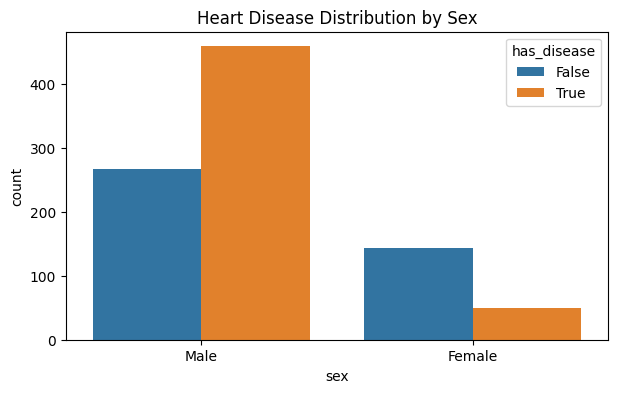

In [26]:
# Disease distribution by sex

if df['has_disease'].dtype != 'object':
    df['has_disease'] = df['has_disease'].map({0: 'False', 1:'True'})
    
plt.figure(figsize=(7,4))
ax = sns.countplot(data=df, x='sex', hue='has_disease')
ax.set_title('Heart Disease Distribution by Sex')
plt.show()


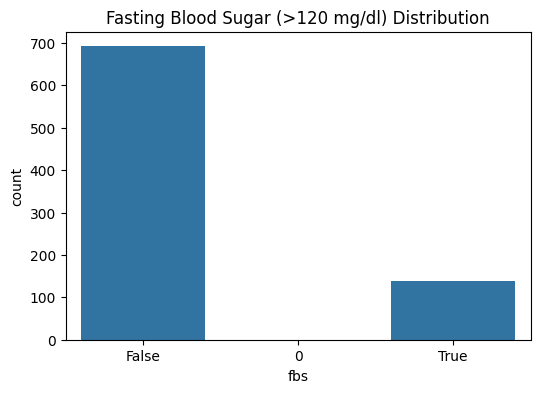

In [15]:
# Fasting blood sugar distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='fbs')
plt.title('Fasting Blood Sugar (>120 mg/dl) Distribution')
plt.show()


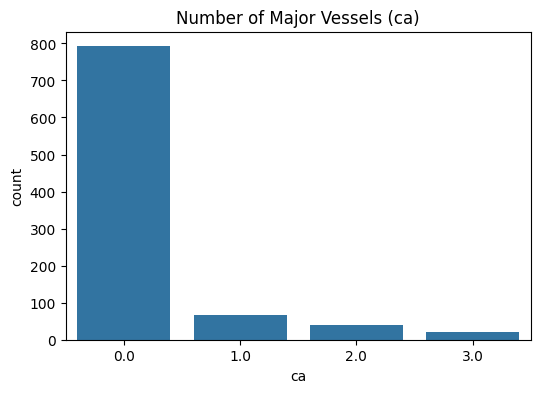

In [16]:
# Number of major vessels
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='ca')
ax.set_title('Number of Major Vessels (ca)')
plt.show()

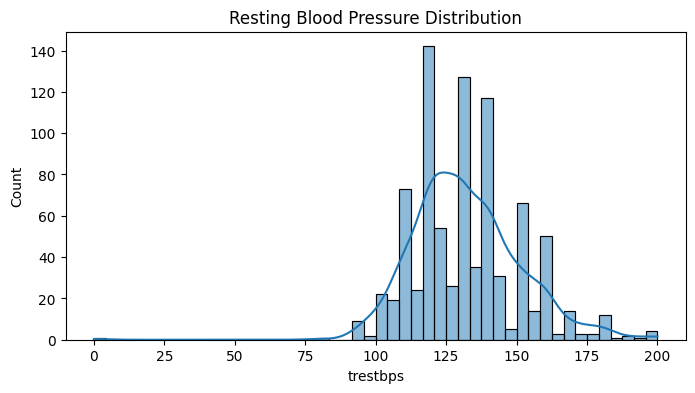

In [17]:
# Resting blood pressure distribution
plt.figure(figsize=(8,4))
sns.histplot(df['trestbps'].dropna(), kde=True)
plt.title('Resting Blood Pressure Distribution')
plt.show()

In [27]:
# Altair interactive scatter
if df['has_disease'].dtype != 'object':
    df['has_disease'] = df['has_disease'].map({0: 'False', 1:'True'})
chart = alt.Chart(df).mark_circle(size=60).encode(
    x='age', y='thalch', color='has_disease:N', tooltip=['id','age','thalch','num']
).interactive()
chart

alt.Chart(...)